# Парная линейная регрессия

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных (берём колонку '0' и используем index_col=0)
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [73]:
class Model(object):
    def __init__(self, b0=1.0, b1=2.0):
        self.b0 = b0
        self.b1 = b1
        self.threshold = 1e-6

    def _to_series(self, data):
        if isinstance(data, pd.DataFrame):
            return data.iloc[:, 0]
        return data

    def predict(self, X):
        X = self._to_series(X)
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        X = self._to_series(X)
        Y = self._to_series(Y)
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.001, max_steps=5000,
            autobreak=False, adaptive_alpha=False):
        X = self._to_series(X)
        Y = self._to_series(Y)
        steps = []
        errors = []

        start_step = 0

        if adaptive_alpha:
            base_b0, base_b1 = self.b0, self.b1
            base_error = self.error(X, Y)
            alpha = 1.0

            self.b0, self.b1 = base_b0, base_b1
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)

            while True:
                self.b0, self.b1 = base_b0, base_b1
                self.b0 -= alpha * dJ0
                self.b1 -= alpha * dJ1

                new_err = self.error(X, Y)
                if new_err <= base_error:
                    steps.append(1)
                    errors.append(new_err)
                    start_step = 1
                    break

                alpha /= 2.0
                if alpha < 1e-6:
                    self.b0, self.b1 = base_b0, base_b1
                    return steps, errors

        for step in range(start_step, max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_err = self.error(X, Y)
            steps.append(step + 1)
            errors.append(new_err)

            if len(errors) >= 2 and autobreak:
                difference = abs(errors[-1] - errors[-2])
                if difference < self.threshold:
                    break

        return steps, errors

    def draw_graphs(self):
        from matplotlib import pyplot as plt
        plt.figure(figsize=(12, 5))
        plt.scatter(x, y, label='Data Points')
        plt.xlabel('x')
        plt.ylabel('y')
        x_line = np.linspace(min(x), max(x), 100)
        y_line = self.b0 + self.b1 * x_line
        plt.plot(x_line, y_line, color='red', label='Fitted Line')
        plt.legend()
        plt.show()

1.0
201.0
initial error: 2779.7235840959734
error after gradient descent: 2.0059226588479424e-25


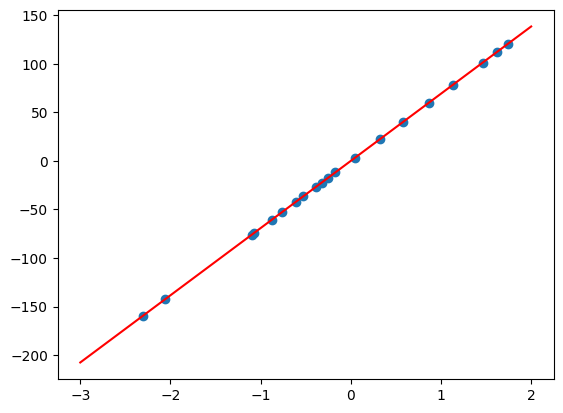

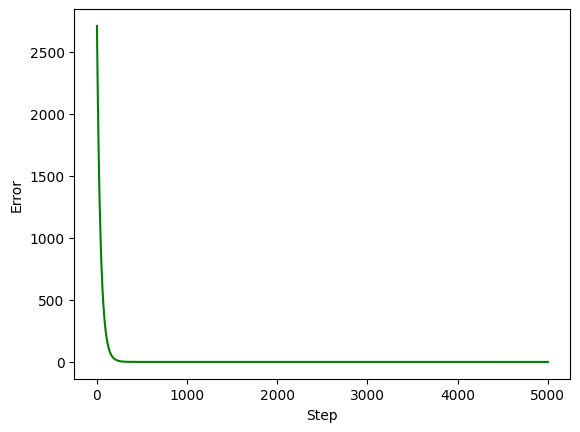

In [74]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
print('initial error:', hyp.error(x, y))

steps, errors = hyp.fit(x, y, alpha=0.01, max_steps=5000)
print('error after gradient descent:', hyp.error(x, y))

# Линия регрессии
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

# График обучения
plt.figure()
plt.plot(steps, errors, 'g')
plt.xlabel('Step')
plt.ylabel('Error')
plt.show()

# EXTRA TASKS

# 1

In [75]:
import random
x_, y_ = random.sample(range(-100, 101), 100), random.sample(range(-100, 101), 100)
for i in range(len(x_)):
    model = Model(b0=x_[i], b1=y_[i])
    steps, errors = model.fit(x, y, alpha=0.01, max_steps=500)
    assert errors[-1] < 1, f"Model did not converge for b0={x_[i]}, b1={y_[i]}"
    print('.', end='')


....................................................................................................

# 2

initial error: 2779.7235840959734
error after gradient descent: 3.01670889926168e+300


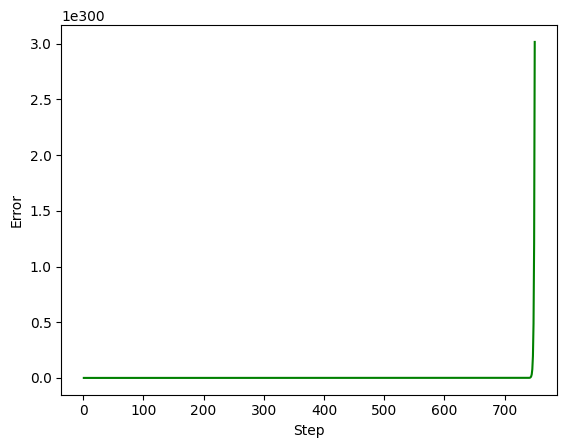

In [76]:
hyp = Model()
print('initial error:', hyp.error(x, y))

steps, errors = hyp.fit(x, y, alpha=2, max_steps=750)
print('error after gradient descent:', hyp.error(x, y))

plt.figure()
plt.plot(steps, errors, 'g')
plt.xlabel('Step')
plt.ylabel('Error')
plt.show()

# 3

In [77]:
model = Model()
xdf = x.to_frame()
ydf = y.to_frame()
assert type(xdf) == pd.DataFrame and type(ydf) == pd.DataFrame, "Input data should be pandas DataFrames"
steps, errors = model.fit(xdf, ydf, alpha=0.01, max_steps=500)
print(errors[-1])


0.03365495647036475


# 4

In [78]:
model = Model()
steps, errors = model.fit(x, y, alpha=0.01, max_steps=5000, autobreak=True)
print('error after gradient descent:', model.error(x, y))
print(len(steps))

error after gradient descent: 5.150253159447793e-05
835


# 5

In [79]:
# yes

# 6

In [80]:
model = Model()
steps, errors = model.fit(x, y, alpha=0.01, max_steps=1000, adaptive_alpha=True)
print('error after gradient descent with adaptive alpha:', model.error(x, y))

model = Model()
steps, errors = model.fit(x, y, alpha=0.01, max_steps=1000, adaptive_alpha=False)
print('error after gradient descent without adaptive alpha:', model.error(x, y))

error after gradient descent with adaptive alpha: 3.0967720910582346e-29
error after gradient descent without adaptive alpha: 2.2645673048909968e-06


# 7

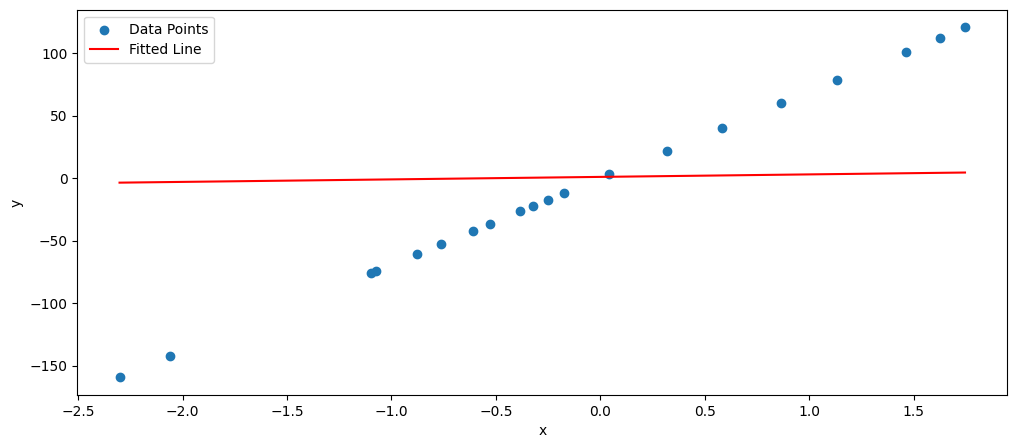

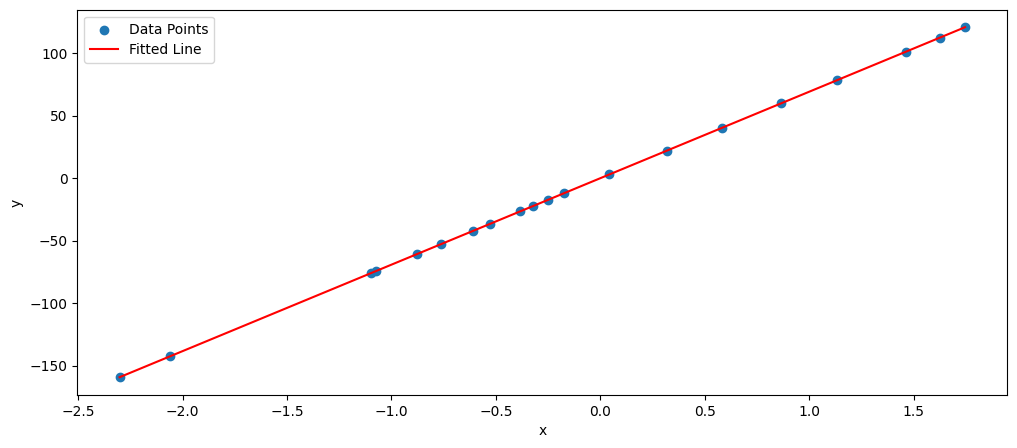

In [82]:
model = Model()
model.draw_graphs()
model.fit(x, y, alpha=0.01, max_steps=1000)
model.draw_graphs()